### 분류 (Classification)
- 입력 데이터를 미리 정외된 여러 클래스 중 하나로 예측하는 것(범주형 데이터)
    - 이진 분류 : 양성(1), 음성(0) 중에 하나를 맞추는 것
    - 다중 분류 : 여러 클래스 중 하나를 맞추는 것

### Logisitc Regression
- 선형 회귀 방식으로 분류 문제를 해결 하는 모델
    - 이진 분류 : 이진 분류를 위한 로지스틱 함수(시그모이드)를 통해 확률값을 계산하고 0 또는 1로 분류 
    - 다중 분류 : 다중 분류를 위한 소프트맥스 함수를 통해 각 클래스별 확률값을 계산해 다중 분류

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### 이진 분류를 위한 Sigmoid 함수
- 선형회귀식을 통해 도출한 예측값(z)을 0과 1 사이의 수로 변환해주는 활성화 함수(Activation Function)
$
    시그모이드(z) = \frac{1}{1+e^{-z}}
$
    - 시그모이드의 값은 ***z값의 크기와 반비례*** 한다.

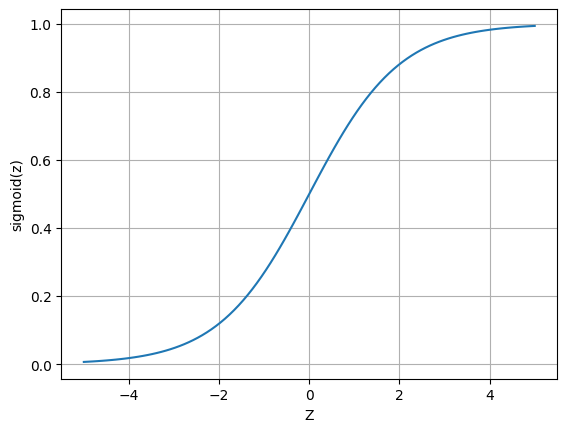

In [2]:

# z = 선형회귀 결과 모델
# 시그모이드 시각화
z = np.linspace(-5,5,100) # 선형회귀 결과값
sigmoid_value = 1 /(1 + np.exp(-z)) # np.exp(-z) = e^-z

plt.plot(z, sigmoid_value)
plt.xlabel('Z')
plt.ylabel('sigmoid(z)')
plt.grid()
plt.show() 



In [ ]:
fish_df = pd.read_csv('./data/fish.csv')
# fish_df['Species'].value_counts()
is_bream_orsmelt = (fish_df['Species'] == 'Bream') | (fish_df['Species'] == 'Smelt')
fish_df = fish_df[is_bream_orsmelt].reset_index()
fish_df


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = fish_df.drop('Species', axis=1)
y = fish_df['Species']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [19]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)

lr_clf.score(X_train_scaled, y_train), lr_clf.score(X_test_scaled, y_test) 


(1.0, 1.0)

In [22]:
y_pred = lr_clf.predict(X_test_scaled[:3])
y_pred # 'Bream', 'Smelt', 'Smelt'

print(lr_clf.classes_)
lr_clf.predict_proba(X_test_scaled[:3])

['Bream' 'Smelt']


array([[0.96120317, 0.03879683],
       [0.00842591, 0.99157409],
       [0.01439468, 0.98560532]])

In [23]:
lr_clf.coef_, lr_clf.intercept_

(array([[ 0.8505655 , -0.47722821, -0.62802888, -0.64912199, -0.67112438,
         -0.64381032]]),
 array([-2.2215244]))

In [25]:
# 선형회귀값 직접 계산
z1 = np.dot(X_test_scaled[:3], lr_clf.coef_[0]) + lr_clf.intercept_
# 선형 회귀값 계산 함수 (decision_function)
z2 = lr_clf.decision_function(X_test_scaled[:3])

z1, z2

(array([-3.20984727,  4.76798194,  4.22639728]),
 array([-3.20984727,  4.76798194,  4.22639728]))

In [26]:
# 시그모이드 함수 적용
sigmoid_value = 1 / (1 + np.exp(-z1))
sigmoid_value

array([0.03879683, 0.99157409, 0.98560532])

In [27]:
['Smelt' if value >= 0.5 else 'Bream' for value in sigmoid_value]

['Bream', 'Smelt', 'Smelt']

### 다중 분류를 위한 Softmax 함수
- 다중 클래스 분류를 위한 활성화 함수로 각 클래스에 대한 확률값 계산
- k 개의 클래스가 존재할 때 주어진 입력에 대해 다음과 같이 계산

$
    softma(z_i) = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}
$

- $z_k$ : 각 클래스에 대한 점수 (입력값)
- $e^{z_k}$ : 해당 점수에 대한 지수 함수 적용
- $\sum_{j=1}^{K} e^{z_j}$ : 모든 클래스 점수에 대해 지수 함수 적용 후 총합

**다중 클래스 확률 계산 순서**
1. 샘플에 대한 회귀 결고 z 계산
2. 소프트 맥스 함수 적용
    - z를 e의 지수로 적용해 값을 확대(클래스별 z의 차이를 극대화)
    - 합을 각 클래스의 값으로 나눠 비율을 계산하고 반환
3. 가장 높은 확률 값을 가진 클래스를 선택

In [39]:
# 데이터 셋 생성
from sklearn.datasets import make_classification

X,y = make_classification(    # 분류 문제 연습을 위한 가상 데이터셋 생성 함수
    n_samples=100,      # 샘플 갯수
    n_features=4,       # 전체 특성(=컬럼) 개수 
    n_informative=3,    # 유의미한 특성 개수
    n_redundant=0,      # 중복 특성 개수
    n_classes=3,        # 클래스 수
    random_state=42     # 랜덤 시드
)
df = pd.DataFrame(X, columns=['feat1','feat2','feat3','feat4'])
df['target'] = y

# 데이터 분리
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=42)

In [40]:
# predict_proba = 클래스별 
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_train,y_train), lr_clf.score(X_test,y_test)

(0.7066666666666667, 0.44)

In [41]:
y_pred = lr_clf.predict(X_test[:5])
y_pred

array([1, 0, 0, 1, 2])

In [43]:
y_pred_proba = lr_clf.predict_proba(X_test[:5])
y_pred_proba, y_pred_proba.sum(axis=1)

(array([[0.22917118, 0.39960169, 0.37122713],
        [0.83550691, 0.16166581, 0.00282727],
        [0.573597  , 0.32484717, 0.10155583],
        [0.20188375, 0.64427073, 0.15384551],
        [0.02755811, 0.07287149, 0.8995704 ]]),
 array([1., 1., 1., 1., 1.]))

In [44]:
# 직접 게산
W = lr_clf.coef_
B = lr_clf.intercept_

W.shape, B.shape #((3,4) = (클래스수, 특성수), (3,) = (클래스수))

((3, 4), (3,))

In [46]:
# 결정함수 (선형회귀값 계산)
Z = lr_clf.decision_function(X_test[:5])
Z

array([[-0.34611464,  0.20988442,  0.13623022],
       [ 2.44374453,  0.80123723, -3.24498176],
       [ 0.76663021,  0.19805797, -0.96468818],
       [-0.29622795,  0.86419902, -0.56797107],
       [-1.48600708, -0.51360637,  1.99961345]])

In [53]:
# softmax 함수
def softmax(z):
    exp_z = np.exp(z)
    # sum의 형식을 유지해야만 값을 계산 가능하다.
    sum_exp_z = np.sum(exp_z, axis=1, keepdims=True)
    
    return exp_z / sum_exp_z

y_pred_proba = softmax(Z)
y_pred_proba

array([[0.22917118, 0.39960169, 0.37122713],
       [0.83550691, 0.16166581, 0.00282727],
       [0.573597  , 0.32484717, 0.10155583],
       [0.20188375, 0.64427073, 0.15384551],
       [0.02755811, 0.07287149, 0.8995704 ]])

In [55]:
# scipy의 softmax 함수 (다중분류를 위한 softmax함수를 구현해둔 라이브러리)
import scipy
import scipy.special

y_pred_proba = scipy.special.softmax(Z, axis=1)
y_pred_proba

array([[0.22917118, 0.39960169, 0.37122713],
       [0.83550691, 0.16166581, 0.00282727],
       [0.573597  , 0.32484717, 0.10155583],
       [0.20188375, 0.64427073, 0.15384551],
       [0.02755811, 0.07287149, 0.8995704 ]])

In [56]:
pred = np.argmax(y_pred_proba, axis=1)
pred

array([1, 0, 0, 1, 2])

- 다중 생성 분류

In [57]:
# 데이터 로드 ./data/fish.csv
fish_df = pd.read_csv('./data/fish.csv')
fish_df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [58]:
# 데이터 분리 및 정규화
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = fish_df.drop('Species', axis=1)
y = fish_df['Species']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [59]:
# 모델 훈련 및 평가
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled,y_train)

lr_clf.score(X_train_scaled, y_train), lr_clf.score(X_test_scaled, y_test)


(0.8067226890756303, 0.85)

In [60]:
# 예측
lr_clf.predict(X_test_scaled[:5]) # 2, 5, 3, 2, 2

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [61]:
# 모델에 저장된 클래스 - 알파벳 순
# 차례대로 0,1,2,3,4,5,6
lr_clf.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [66]:
y_pred_proba = lr_clf.predict_proba(X_test_scaled[:5])
print(y_pred_proba.sum(axis=1))
print()

pred = np.argmax(y_pred_proba, axis=1)
print(pred)

[1. 1. 1. 1. 1.]

[2 5 3 2 2]


In [69]:
print(lr_clf.coef_.shape,'\n', lr_clf.intercept_.shape)

(7, 5) 
 (7,)


In [81]:
# 각 클래스 별 z 값 계산 : 직접 계산
# w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 0
print(np.dot(lr_clf.coef_[0], X_test_scaled[0]) + lr_clf.intercept_[0], '\n')
print(np.dot(lr_clf.coef_[1], X_test_scaled[0]) + lr_clf.intercept_[1], '\n')
print(np.dot(lr_clf.coef_[2], X_test_scaled[0]) + lr_clf.intercept_[2], '\n')
print(np.dot(lr_clf.coef_[3], X_test_scaled[0]) + lr_clf.intercept_[3], '\n')
print(np.dot(lr_clf.coef_[4], X_test_scaled[0]) + lr_clf.intercept_[4], '\n')
print(np.dot(lr_clf.coef_[5], X_test_scaled[0]) + lr_clf.intercept_[5], '\n')
print(np.dot(lr_clf.coef_[6], X_test_scaled[0]) + lr_clf.intercept_[6], '\n')

# 각 클래스별 Z 값 계산 : 결정 함수
z = lr_clf.decision_function(X_test_scaled[:1])

# softmax 함수 적용 -> 확률값 변환
p = softmax(Z)
print('P : '  , p)


# 확률값이 가장 높은 클래스로 예측
label = lr_clf.classes_[np.argmax(p, axis=1)]
print('label : ', label)

-2.1950573063441587 

0.7139490860866945 

2.5645907861560397 

-1.7196473106832175 

1.9617300510826055 

0.02219842185963916 

-1.3477637281576118 

P :  [[0.22917118 0.39960169 0.37122713]
 [0.83550691 0.16166581 0.00282727]
 [0.573597   0.32484717 0.10155583]
 [0.20188375 0.64427073 0.15384551]
 [0.02755811 0.07287149 0.8995704 ]]
label :  ['Parkki' 'Bream' 'Bream' 'Parkki' 'Perch']
